In [ ]:
import numpy as np
import pandas as pd
import re, string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline
import streamlit as st

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv("projectdata.csv")
df

,Unnamed: 0,news_headline,news_article,news_category
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology
...,...,...,...,...
4812,4812,AstraZeneca to test combining Oxford vaccine w...,"AstraZeneca, which is developing a coronavirus...",science
4813,4813,"Humanity will face 60°C temperatures in 2050s,...",As many as two billion people will face 60°C t...,science
4814,4814,Human-made objects to outweigh living things b...,Scientists have said that the weight of human-...,science
4815,4815,"IUCN lists 31 species as 'Extinct', European B...",The IUCN released an update of its Red List of...,science


In [4]:
#No. of categories
len(set(df['news_category']))

7

In [5]:
df.groupby("news_category").news_category.count()

news_category
automobile        256
entertainment     998
politics          546
science           389
sports            856
technology        751
world            1021
Name: news_category, dtype: int64

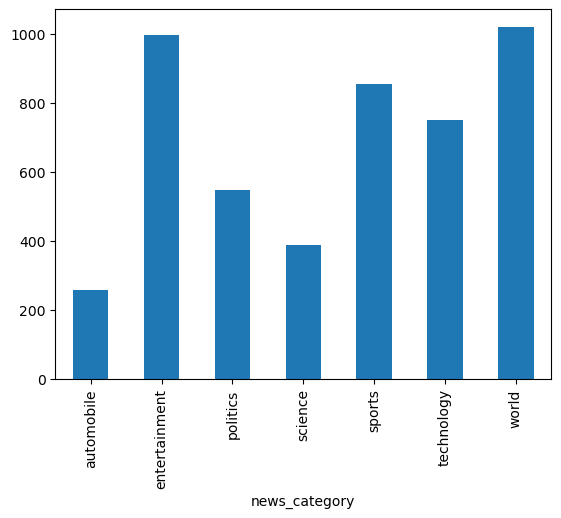

In [6]:
#Analyzing Data
df.groupby("news_category").news_category.count().plot.bar()
plt.show()

# Data Cleaning

In [7]:
words = stopwords.words("english")
words.extend(["a", "an", "the"])
words
stemmer = PorterStemmer()
df['cleaned'] = df['news_article'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x.lower()).split() if i not in words]).lower())
df['cleaned']


0       deepmind ai system alphafold recognis solut pr...
1       microsoft team stop work internet explor today...
2       china respons report us ad chines chipmak smic...
3       global smartphon sale third quarter fell year ...
4       european union eu hope us presid elect joe bid...
                              ...                        
4812    astrazeneca develop coronaviru vaccin oxford u...
4813    mani two billion peopl face c temperatur tenth...
4814    scientist said weight human made object like e...
4815    iucn releas updat red list threaten speci move...
4816    environ minist prakash javadekar said india hi...
Name: cleaned, Length: 4817, dtype: object

In [8]:
df

,Unnamed: 0,news_headline,news_article,news_category,cleaned
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology,deepmind ai system alphafold recognis solut pr...
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology,microsoft team stop work internet explor today...
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology,china respons report us ad chines chipmak smic...
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology,global smartphon sale third quarter fell year ...
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology,european union eu hope us presid elect joe bid...
...,...,...,...,...,...
4812,4812,AstraZeneca to test combining Oxford vaccine w...,"AstraZeneca, which is developing a coronavirus...",science,astrazeneca develop coronaviru vaccin oxford u...
4813,4813,"Humanity will face 60°C temperatures in 2050s,...",As many as two billion people will face 60°C t...,science,mani two billion peopl face c temperatur tenth...
4814,4814,Human-made objects to outweigh living things b...,Scientists have said that the weight of human-...,science,scientist said weight human made object like e...
4815,4815,"IUCN lists 31 species as 'Extinct', European B...",The IUCN released an update of its Red List of...,science,iucn releas updat red list threaten speci move...


## Training Model

In [9]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
vectorizer = TfidfVectorizer(stop_words = "english")
X = df['cleaned'] # independent
Y = df["news_category"] # dependent
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)


# Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                    ("chi", SelectKBest(chi2, k=1200)),
                     ("clf", LogisticRegression(random_state = 0))])

# Training the model
model = pipeline.fit(X_train, Y_train)


30% of data is being used for testing purpose in this case.

In [10]:
# Accuracy
from sklearn.metrics import accuracy_score
predicted_category = model.predict(X_test)
print(accuracy_score(Y_test, predicted_category))


0.8686030428769018


Here, we got an accuracy score of 87.06%.

# Classification Report and Confusion Matrix

In [11]:
ytest = np.array(Y_test)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

               precision    recall  f1-score   support

   automobile       0.81      0.65      0.72        79
entertainment       0.90      0.96      0.93       313
     politics       0.96      0.91      0.93       174
      science       0.84      0.66      0.74       108
       sports       0.98      0.93      0.96       253
   technology       0.84      0.76      0.80       218
        world       0.76      0.92      0.83       301

     accuracy                           0.87      1446
    macro avg       0.87      0.82      0.84      1446
 weighted avg       0.87      0.87      0.87      1446

[[ 51   2   0   1   2  17   6]
 [  0 300   1   0   1   1  10]
 [  0   5 158   0   0   0  11]
 [  0   1   0  71   0   7  29]
 [  0   9   1   0 235   0   8]
 [ 12   6   1   9   0 165  25]
 [  0   9   4   4   1   7 276]]


In [ ]:
news = input("Enter news = ")
news_data = {'predicted_category':[news]}
news_data_df = pd.DataFrame(news_data)

predict_news_cat = model.predict(news_data_df['predicted_category'])
print("Predicted news category = ",predict_news_cat[0])